<a href="https://colab.research.google.com/github/antnmttsc/Image-Classification/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brief Exploratory Analysis

In [ ]:
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import tree
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.neighbors import KNeighborsClassifier

 I made a function below to ease the process of loading the dataset.

In [ ]:
def load_fashion_mnist():

    url_base = "https://www.math.unipd.it/~dasan/"
    Y_train = np.frombuffer(urlopen(url_base + "train-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_train = np.frombuffer(urlopen(url_base + "train-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_train), 784) # besides loadng
                                                                                            #the data, I already flatten it into a vector
    Y_test = np.frombuffer(urlopen(url_base + "t10k-labels-idx1-ubyte").read(), dtype=np.uint8, offset=8)
    X_test = np.frombuffer(urlopen(url_base + "t10k-images-idx3-ubyte").read(), dtype=np.uint8, offset=16).reshape(len(Y_test), 784)

    return X_train, Y_train, X_test, Y_test


In [ ]:
X_train, Y_train, X_test, Y_test = load_fashion_mnist() # you can use this function (copying the whole box) in your code to easily load the data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

np.random.seed(123)

(60000, 784) (60000,) (10000, 784) (10000,)


Plot some training exemples to see the encoding get well

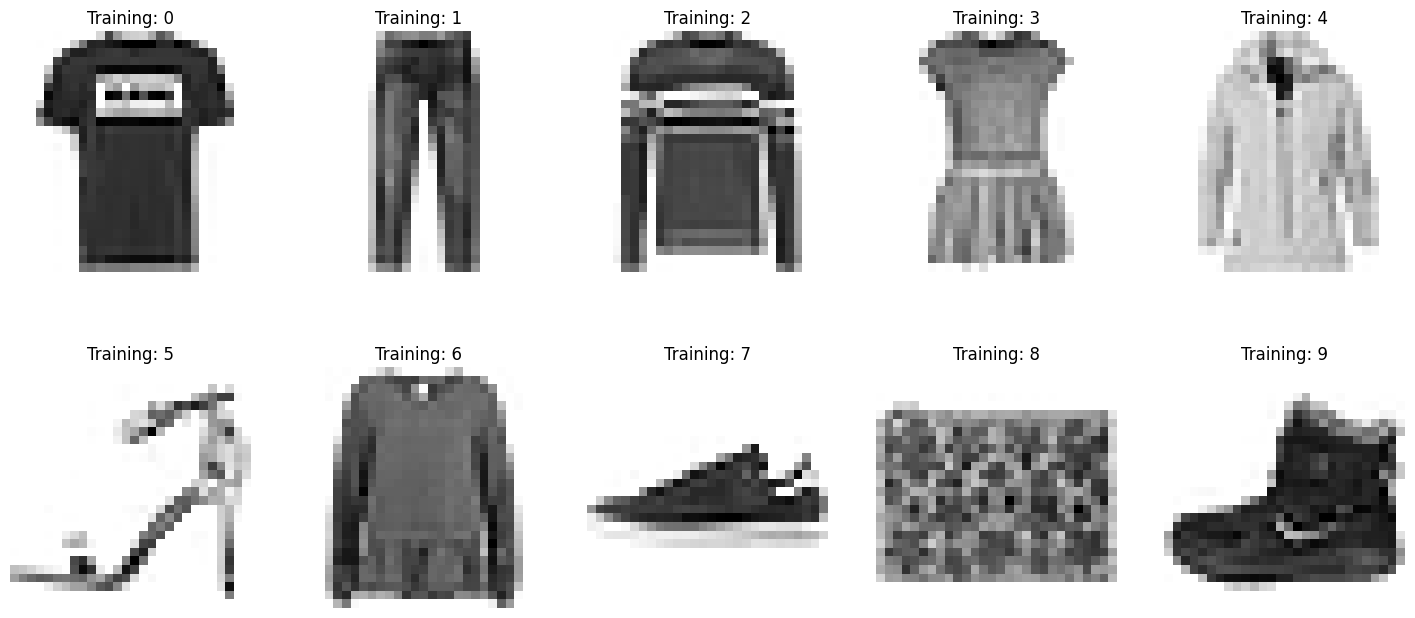

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))

idx_vec = []
for val in range(0, 10):
    for idx, target in enumerate(Y_train):
        if target == val:
            idx_vec.append(idx)
            break

for ax, image, label in zip(axes.flatten(), X_train[idx_vec], Y_train[idx_vec]):
    ax.axis('off')  # Turn off axis
    image = image.reshape((28, 28))
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

plt.show()

In [ ]:
single_val, count_ = np.unique(Y_train, return_counts=True)
for valore, cont in zip(single_val, count_):
    print(f"{valore} appear {cont} times.")

0 appear 6000 times.
1 appear 6000 times.
2 appear 6000 times.
3 appear 6000 times.
4 appear 6000 times.
5 appear 6000 times.
6 appear 6000 times.
7 appear 6000 times.
8 appear 6000 times.
9 appear 6000 times.


Balanced Data

# Utilies Functions for Model Evaluation and Performance Comparison

In [ ]:
evaluate_model = {}

def evaluate_my_model(my_model, name, scale_data):
  if scale_data:

    Y_train_pred = my_model.predict(X_train_scaled)

    start_pred_time = time.time()
    Y_test_pred = my_model.predict(X_test_scaled)
    end_pred_time = time.time()

    my_model_name = name +"_std"

  if not scale_data:

    Y_train_pred = my_model.predict(X_train)

    start_pred_time = time.time()
    Y_test_pred = my_model.predict(X_test)
    end_pred_time = time.time()

    my_model_name = name

  training_time = end_time - start_time
  pred_time = end_pred_time - start_pred_time

  evaluate_model[my_model_name] = {}

  evaluate_model[my_model_name]['accuracy_train'] = float("{:.5f}".format(accuracy_score(Y_train, Y_train_pred)))
  evaluate_model[my_model_name]['accuracy_test'] = float("{:.5f}".format(accuracy_score(Y_test, Y_test_pred)))

  evaluate_model[my_model_name]['tr_time'] = float("{:.5f}".format(training_time))
  evaluate_model[my_model_name]['test_pred_time'] = float("{:.5f}".format(pred_time))

  return evaluate_model

In [ ]:
# SCALING DATA
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PERCEPTRON

PERCEPTRON STD

In [ ]:
perc_std = Perceptron(fit_intercept = True)  #define the model

start_time = time.time()
perc_std.fit(X_train_scaled, Y_train)  # train phase
end_time = time.time()

In [ ]:
evaluate_my_model(perc_std, "perceptron", True)

{'perceptron': {'accuracy_train': 0.802,
  'accuracy_test': 0.7775,
  'tr_time': 16.52988,
  'test_pred_time': 0.04418},
 'svm_std': {'accuracy_train': 0.66078,
  'accuracy_test': 0.6469,
  'tr_time': 103.48861,
  'test_pred_time': 40.20065},
 'perceptron_std': {'accuracy_train': 0.82322,
  'accuracy_test': 0.8,
  'tr_time': 19.66905,
  'test_pred_time': 0.10349}}

# LOGISTIC REGRESSION

In [ ]:
clf_lr = LogisticRegression(max_iter = 200)

start_time = time.time()

clf_lr.fit(X_train_scaled, Y_train)

end_time = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
evaluate_my_model(clf_lr, "lr", True)

{'perceptron': {'accuracy_train': 0.802,
  'accuracy_test': 0.7775,
  'tr_time': 16.52988,
  'test_pred_time': 0.04418},
 'svm_std': {'accuracy_train': 0.66078,
  'accuracy_test': 0.6469,
  'tr_time': 103.48861,
  'test_pred_time': 40.20065},
 'perceptron_std': {'accuracy_train': 0.82322,
  'accuracy_test': 0.8,
  'tr_time': 19.66905,
  'test_pred_time': 0.10349},
 'lr_std': {'accuracy_train': 0.88153,
  'accuracy_test': 0.8371,
  'tr_time': 75.0469,
  'test_pred_time': 0.04479}}

# SVM

In [ ]:
svm_clf = SVC(kernel = 'poly', degree = 3, coef0 = 1, max_iter = 200, random_state = 42)

start_time = time.time()
svm_clf.fit(X_train_scaled, Y_train)
end_time = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
evaluate_my_model(svm_clf,"svm", True)

{'perceptron': {'accuracy_train': 0.802,
  'accuracy_test': 0.7775,
  'tr_time': 21.31968,
  'test_pred_time': 0.07142},
 'svm_std': {'accuracy_train': 0.66078,
  'accuracy_test': 0.6469,
  'tr_time': 103.48861,
  'test_pred_time': 40.20065}}

# TREE

In [ ]:
tree_clf = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 20, random_state = 42)

start_time = time.time()
tree_clf.fit(X_train_scaled, Y_train)
end_time = time.time()

In [ ]:
evaluate_my_model(tree_clf, "tree", True)

{'perceptron': {'accuracy_train': 0.802,
  'accuracy_test': 0.7775,
  'tr_time': 16.52988,
  'test_pred_time': 0.04418},
 'svm_std': {'accuracy_train': 0.66078,
  'accuracy_test': 0.6469,
  'tr_time': 103.48861,
  'test_pred_time': 40.20065},
 'perceptron_std': {'accuracy_train': 0.82322,
  'accuracy_test': 0.8,
  'tr_time': 19.66905,
  'test_pred_time': 0.10349},
 'lr_std': {'accuracy_train': 0.88153,
  'accuracy_test': 0.8371,
  'tr_time': 75.0469,
  'test_pred_time': 0.04479},
 'tree_std': {'accuracy_train': 0.87942,
  'accuracy_test': 0.8096,
  'tr_time': 35.45064,
  'test_pred_time': 0.02992}}

# NEURAL NETWORK

In [ ]:
num_classes = len(np.unique(Y_train))

Y_train_cat = to_categorical(Y_train, num_classes)
Y_test_cat = to_categorical(Y_test, num_classes)

In [ ]:
#fix the seed
tf.random.set_seed(2)
tf.keras.utils.set_random_seed(10)
# set tensorflow as detrministic
tf.config.experimental.enable_op_determinism()

feature_vector_length = X_train_scaled.shape[1]
units_dim = X_train_scaled.shape[0]

In [ ]:
nn_model = Sequential([Dense(units = units_dim,
                             activation='relu',
                             input_dim = feature_vector_length),
                    Dense(units = np.sqrt(units_dim),
                          activation='relu'),
                    Dense(num_classes,
                          activation='softmax')])
nn_model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

es = EarlyStopping(monitor = 'val_loss', #quantity to be monitored
                   mode = 'min', #I look for decreasing patterns stop
                   patience = 3, #number of epochs with no improvement
                   verbose = 0)

In [ ]:
perc = load('/content/perc_model.sav')

In [ ]:
# train the model
start_time = time.time()
history = nn_model.fit(X_train_scaled, Y_train_cat,
                    epochs = 200, # number of epochs
                    verbose = 0,
                    validation_split = 0.20,
                    callbacks = [es],
                    shuffle = False)
end_time = time.time()
training_time = end_time - start_time

In [ ]:
start_time = time.time()
accuracy_nn = nn_model.evaluate(X_test_scaled, Y_test_cat)[1]
end_time = time.time()

pred_time = end_time - start_time

train_accuracy = history.history['accuracy'][-1]

313/313 [==============================] - 54s 172ms/step - loss: 0.3411 - accuracy: 0.8881


82.25792860984802

In [ ]:
nn_model.evaluate(X_train_scaled, Y_train_cat)[1]

1875/1875 [==============================] - 248s 132ms/step - loss: 0.1601 - accuracy: 0.9462


0.9462000131607056

In [ ]:
evaluate_model["nn_std"] = {'accuracy_train' :  train_accuracy,
                            'accuracy_test': accuracy_nn,
                            'tr_time': training_time,
                            'test_pred_time': pre_time}

# KNN

In [ ]:
num_classes = len(np.unique(Y_train))
neigh = KNeighborsClassifier(n_neighbors = num_classes)

In [ ]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Predict on the test set
Y_pred = neigh.predict(X_test)

accuracy_knn = accuracy_score(Y_test, Y_pred)

In [ ]:
print(f"ACCURACY KNN: %.5f"%accuracy_knn)

ACCURACY KNN: 0.85150


**TELESCOPIC SEARCH** for hyperparameter search

In [ ]:
c_values = [5,10,20,50,100]

best_accuracy = 0
best_c = 0
best_model = None

for c in c_values:

    neigh = KNeighborsClassifier(n_neighbors = c)
    neigh.fit(X_train, Y_train)
    Y_pred = neigh.predict(X_test)
    accuracy_knn = accuracy_score(Y_test, Y_pred)

    if accuracy_knn > best_accuracy:
      best_accuracy = accuracy_knn
      best_c = c
      best_model = neigh


In [ ]:
print("Best C: %i \nBest Accuracy: %.5f"%(best_c, best_accuracy))

Best C: 5 
Best Accuracy: 0.85540


In [ ]:
c_values_f = [4,7,9]

best_accuracy_f = 0
best_c_f = 0
best_model_f = None

for c in c_values_f:

    neigh = KNeighborsClassifier(n_neighbors = c)
    neigh.fit(X_train, Y_train)
    Y_pred = neigh.predict(X_test)
    accuracy_knn = accuracy_score(Y_test, Y_pred)

    if accuracy_knn > best_accuracy_f:
      best_accuracy_f = accuracy_knn
      best_c_f = c
      best_model_f = neigh

print("Best C: %i \nBest Accuracy: %.5f"%(best_c_f, best_accuracy_f))

Best C: 4 
Best Accuracy: 0.85770


In [ ]:
neigh = KNeighborsClassifier(n_neighbors = best_c_f)

start_time = time.time()
neigh.fit(X_train, Y_train)
end_time = time.time()

evaluate_my_model(best_model_f, "knn", False)

{'perceptron': {'accuracy_train': 0.802,
  'accuracy_test': 0.7775,
  'tr_time': 16.52988,
  'test_pred_time': 0.04418},
 'svm_std': {'accuracy_train': 0.66078,
  'accuracy_test': 0.6469,
  'tr_time': 103.48861,
  'test_pred_time': 40.20065},
 'perceptron_std': {'accuracy_train': 0.82322,
  'accuracy_test': 0.8,
  'tr_time': 19.66905,
  'test_pred_time': 0.10349},
 'lr_std': {'accuracy_train': 0.88153,
  'accuracy_test': 0.8371,
  'tr_time': 75.0469,
  'test_pred_time': 0.04479},
 'tree_std': {'accuracy_train': 0.87942,
  'accuracy_test': 0.8096,
  'tr_time': 35.45064,
  'test_pred_time': 0.02992},
 'nn_std': {'accuracy_train': 0.9462,
  'accuracy_test': 0.8881,
  'tr_time': 7996.59192,
  'test_pred_time': 82.25793},
 'knn': {'accuracy_train': 0.90822,
  'accuracy_test': 0.8577,
  'tr_time': 0.01778,
  'test_pred_time': 46.52498}}

# MODEL COMPARISON



In [ ]:
import json
file_path = "/content/evaluate_model.json" # !! BE SURE TO INSERT YOUR PERSONAL PATH !!
with open(file_path, 'r') as file:
    evaluate_model = json.load(file)

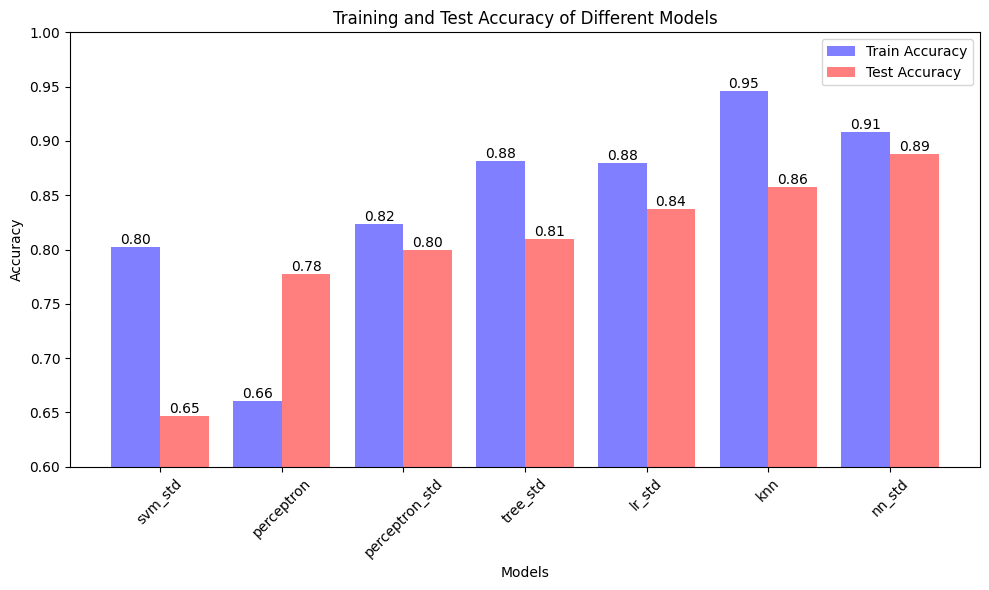

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = list(evaluate_model.keys())
train_accuracy = [evaluate_model[model]['accuracy_train'] for model in models]
test_accuracy = [evaluate_model[model]['accuracy_test'] for model in models]

sorted_models = [model for _, model in sorted(zip(test_accuracy, models))]
sorted_test_accuracy = sorted(test_accuracy)

bar_width = 0.4
x_train = np.arange(len(models))
x_test = [x + bar_width for x in x_train]

plt.figure(figsize=(10, 6))
bars_train = plt.bar(x_train, train_accuracy, color='b', width=bar_width, alpha=0.5, label='Train Accuracy')
bars_test = plt.bar(x_test, sorted_test_accuracy, color='r', width=bar_width, alpha=0.5, label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy of Different Models')
plt.xticks([x + bar_width / 2 for x in x_train], sorted_models, rotation=45)
plt.legend()

plt.ylim(0.6, 1)

for bar in bars_train + bars_test:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, '%.2f' % height, ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In the provided results, both training and test accuracy for each model are presented. The Neural Network model trained on standardized data stands out as the most accurate, achieving an accuracy of 0.89 on the test set. This performance is closely followed by the k-Nearest Neighbors (KNN) classifier. However, the Neural Network demonstrates superior generalization ability over the training set compared to KNN.
On the other end of the spectrum, the Support Vector Machine (SVM) exhibits the poorest performance with an accuracy of 0.65

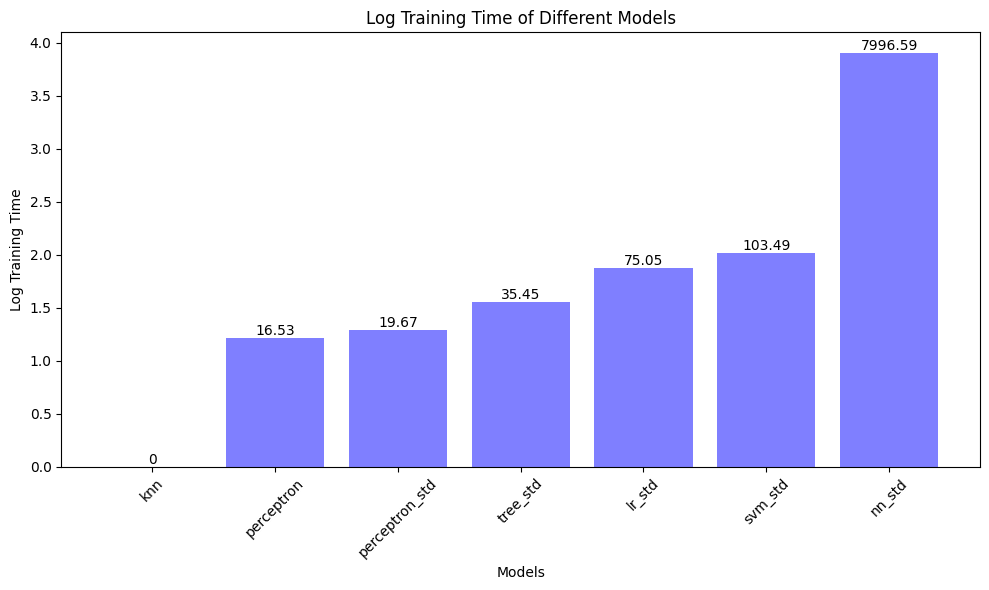

In [ ]:
train_times = [evaluate_model[model]['tr_time'] for model in models]

log_train_times = np.log10(train_times)

log_train_times = np.clip(log_train_times, a_min=0, a_max=None)

sorted_models = [model for _, model in sorted(zip(log_train_times, models))]
sorted_train_times = sorted(log_train_times)

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_models, sorted_train_times, color='b', alpha=0.5)
plt.xlabel('Models')
plt.ylabel('Log Training Time')
plt.title('Log Training Time of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()

for bar, log_time in zip(bars, sorted_train_times):
    height = bar.get_height()
    if log_time == 0:
        plt.text(bar.get_x() + bar.get_width()/2., 0, '0', ha='center', va='bottom')
    else:
        original_time = 10 ** log_time
        plt.text(bar.get_x() + bar.get_width()/2., height, '%.2f' % original_time, ha='center', va='bottom')

plt.show()

Despite the high performance of the neural network, it's evident from this graph that the training time required is approximately 80 times that of the support vector machine (which ranks second to last in efficiency). The most efficient model is, of course, the k-Nearest Neighbors (KNN) since it doesn't involve a training phase.

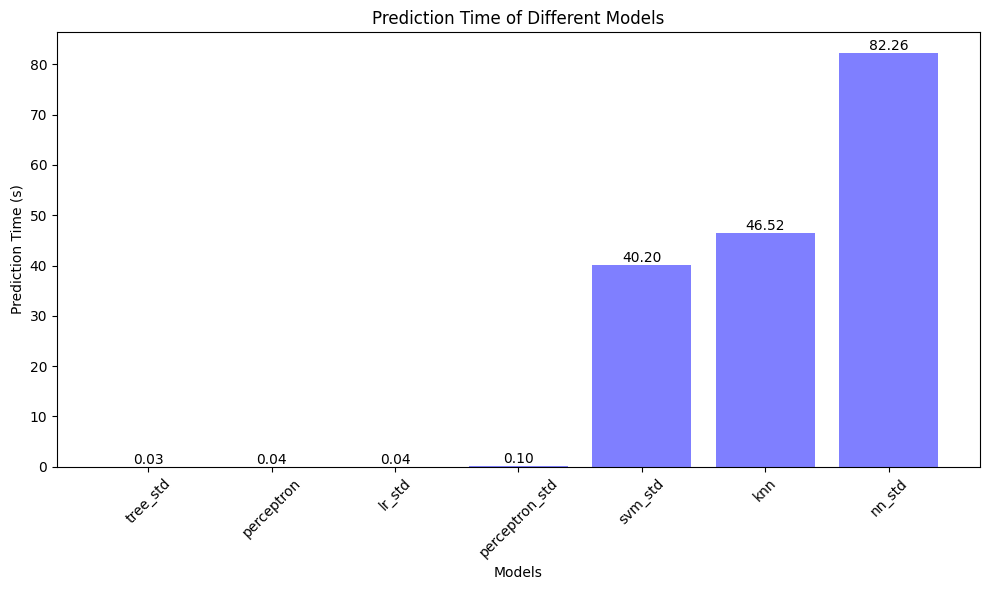

In [ ]:
pred_times = [evaluate_model[model]['test_pred_time'] for model in models]

sorted_models = [model for _, model in sorted(zip(pred_times, models))]
sorted_pred_times = sorted(pred_times)

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_models, sorted_pred_times, color='b', alpha=0.5)
plt.xlabel('Models')
plt.ylabel('Prediction Time (s)')
plt.title('Prediction Time of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()

for bar, time in zip(bars, sorted_pred_times):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, '%.2f' % time, ha='center', va='bottom')

plt.show()

The worst-performing model, considering the time taken to make predictions, is once again the neural network. Contrary to what was observed in the previous graph, k-Nearest Neighbors (KNN) ranks among the worst models for making predictions. In fact, theory suggests that to make predictions, one must calculate the distance of the new observation from all those present in the training set, with a computational complexity of $O(n)$. Lastly, the best-performing model is the decision tree, which we know has a computational complexity in these circumstances equal to $O(log(n))$.